![DL](https://i.pinimg.com/originals/80/69/ff/8069ff8800db3877fde33c55c55f4cdf.jpg)

---

### <font color='navy'>  Instructions <font color='black'> 
Some key points:

We'll be using the 5m train/test data to validate the results of the environment.
    
- Remember that we are doing sequential decision modeling, so consider that, for every action the agent takes in our trading environment, we'll increase the time step by one (from t, to t+1, whatever that means).
    
- Define the action space for the trading environment.
- Define the state space.
- Make a reward system that encourages the agent to make profits.

Keep in mind that the agent may decide to do nothing to avoid penalties, find a way to deal with that.
Our `TradingEnv` class must have the same methods as the Gymnasium Environments, `env.step()`, `env.reset()`.
 

-------

In [9]:
from deep_learning import Operation, TradingStrategy
from pasiva import calcular_rendimiento_pasiva

In [10]:
from pasiva import calcular_rendimiento_pasiva

In [11]:
strategy = TradingStrategy('5m')

In [12]:
strategy.optimize_and_fit_models()

/Users/luisrobles/Desktop/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 1s 317us/step - accuracy: 0.5001 - loss: 1.2201 - val_accuracy: 0.4865 - val_loss: 0.6941
Epoch 2/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - accuracy: 0.4995 - loss: 0.7228 - val_accuracy: 0.4872 - val_loss: 0.7088
Epoch 3/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - accuracy: 0.5005 - loss: 0.7116 - val_accuracy: 0.4872 - val_loss: 0.7346
Epoch 4/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - accuracy: 0.4982 - loss: 0.7183 - val_accuracy: 0.5128 - val_loss: 0.7140
Epoch 5/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - accuracy: 0.4991 - loss: 0.7086 - val_accuracy: 0.5128 - val_loss: 0.6932
Epoch 6/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - accuracy: 0.5000 - loss: 0.7008 - val_accuracy: 0.4872 - val_loss: 0.7251
Epoch 7/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - accuracy: 0.4938 - loss: 0.7026 - val_accuracy: 0.5128 - val_loss: 0.6929
Epoch 8/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - accuracy: 0.4958 -

/Users/luisrobles/Desktop/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1101/1101 ━━━━━━━━━━━━━━━━━━━━ 1s 311us/step - accuracy: 0.4997 - loss: 0.8002 - val_accuracy: 0.4854 - val_loss: 0.7358
Epoch 2/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - accuracy: 0.5016 - loss: 0.7401 - val_accuracy: 0.4854 - val_loss: 0.7296
Epoch 3/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - accuracy: 0.4932 - loss: 0.7243 - val_accuracy: 0.4859 - val_loss: 0.7078
Epoch 4/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - accuracy: 0.5031 - loss: 0.7214 - val_accuracy: 0.5146 - val_loss: 0.7048
Epoch 5/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - accuracy: 0.4981 - loss: 0.7083 - val_accuracy: 0.4857 - val_loss: 0.7014
Epoch 6/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - accuracy: 0.5078 - loss: 0.7087 - val_accuracy: 0.5143 - val_loss: 0.6929
Epoch 7/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - accuracy: 0.5017 - loss: 0.7053 - val_accuracy: 0.4854 - val_loss: 0.7008
Epoch 8/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - accuracy: 0.5054 - loss: 0.70

Epoch 20/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - accuracy: 0.5077 - loss: 0.6931 - val_accuracy: 0.5128 - val_loss: 0.6929
Epoch 21/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.5068 - loss: 0.6931 - val_accuracy: 0.5128 - val_loss: 0.6928
Epoch 22/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - accuracy: 0.5051 - loss: 0.6931 - val_accuracy: 0.5128 - val_loss: 0.6928
Epoch 23/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - accuracy: 0.5049 - loss: 0.6931 - val_accuracy: 0.5128 - val_loss: 0.6928
Epoch 24/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - accuracy: 0.5049 - loss: 0.6931 - val_accuracy: 0.5128 - val_loss: 0.6927
Epoch 25/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.5053 - loss: 0.6932 - val_accuracy: 0.5128 - val_loss: 0.6928
Epoch 26/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 1s 648us/step - accuracy: 0.5015 - loss: 0.6932 - val_accuracy: 0.5128 - val_loss: 0.6928
Epoch 27/30
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - accuracy: 

/Users/luisrobles/Desktop/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1101/1101 ━━━━━━━━━━━━━━━━━━━━ 1s 457us/step - accuracy: 0.5031 - loss: 0.7889 - val_accuracy: 0.4872 - val_loss: 0.7055
Epoch 2/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.4932 - loss: 0.7225 - val_accuracy: 0.4872 - val_loss: 0.7248
Epoch 3/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.5050 - loss: 0.7108 - val_accuracy: 0.5128 - val_loss: 0.6953
Epoch 4/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.5035 - loss: 0.7033 - val_accuracy: 0.4872 - val_loss: 0.7116
Epoch 5/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.5059 - loss: 0.7000 - val_accuracy: 0.5128 - val_loss: 0.6992
Epoch 6/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.5008 - loss: 0.6996 - val_accuracy: 0.5128 - val_loss: 0.6928
Epoch 7/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.4950 - loss: 0.6947 - val_accuracy: 0.4872 - val_loss: 0.6951
Epoch 8/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.5001 - loss: 0.69

/Users/luisrobles/Desktop/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1101/1101 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - accuracy: 0.4998 - loss: 0.8241 - val_accuracy: 0.5146 - val_loss: 0.7617
Epoch 2/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.5001 - loss: 0.7191 - val_accuracy: 0.4857 - val_loss: 0.7165
Epoch 3/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.5009 - loss: 0.7111 - val_accuracy: 0.4865 - val_loss: 0.6935
Epoch 4/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.5061 - loss: 0.7014 - val_accuracy: 0.5146 - val_loss: 0.6994
Epoch 5/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.4981 - loss: 0.7010 - val_accuracy: 0.5146 - val_loss: 0.6927
Epoch 6/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.4964 - loss: 0.6958 - val_accuracy: 0.5146 - val_loss: 0.6941
Epoch 7/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.5024 - loss: 0.6955 - val_accuracy: 0.5146 - val_loss: 0.6927
Epoch 8/10
1101/1101 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.5055 - loss: 0.69

In [13]:
strategy.run_combinations()

Ejecutando con combinación de indicadores: ['dnn']
Ejecutando con combinación de indicadores: ['lstm']
Ejecutando con combinación de indicadores: ['cnn']
Ejecutando con combinación de indicadores: ['dnn', 'lstm']
Ejecutando con combinación de indicadores: ['dnn', 'cnn']
Ejecutando con combinación de indicadores: ['lstm', 'cnn']
Ejecutando con combinación de indicadores: ['dnn', 'lstm', 'cnn']
Mejor combinación de indicadores: ['dnn'] con un valor de estrategia de: 855293.2245236284


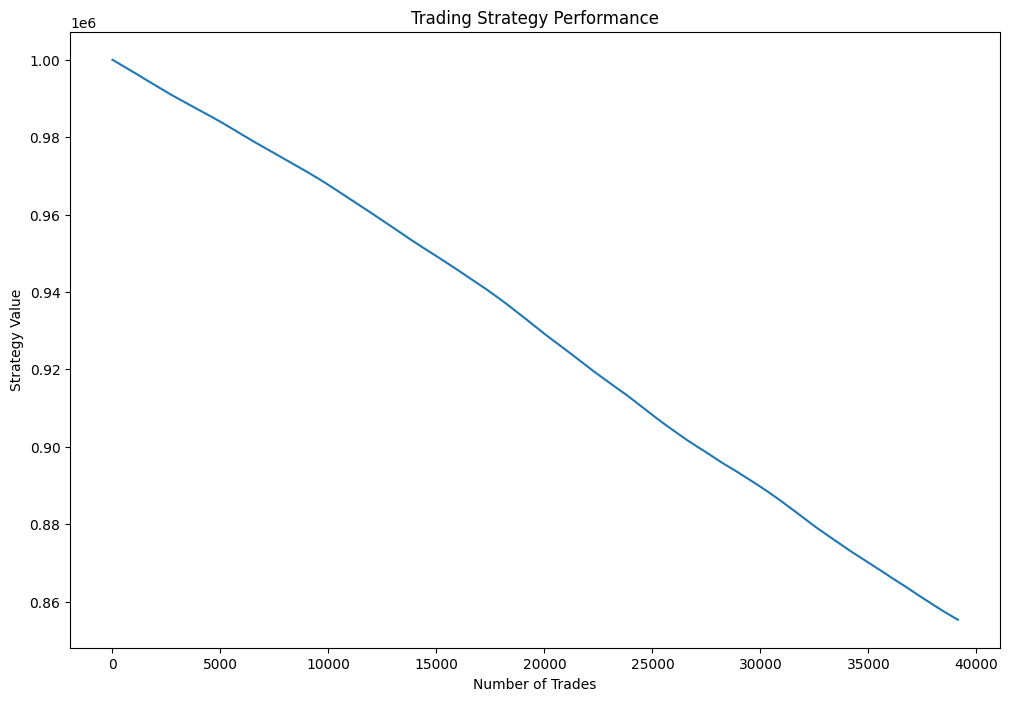

In [14]:
strategy.plot_results(best = True)

In [15]:
strategy.optimize_trade_parameters()

[I 2024-04-11 23:27:57,615] A new study created in memory with name: no-name-4a9db891-1e3f-4171-b999-248e7b4de005
[I 2024-04-11 23:28:09,980] Trial 0 finished with value: -389185.0445729305 and parameters: {'stop_loss_pct': 0.9160239866836022, 'take_profit_pct': 1.0294414172273405, 'n_shares': 96}. Best is trial 0 with value: -389185.0445729305.
[I 2024-04-11 23:28:22,368] Trial 1 finished with value: 681645.0939520315 and parameters: {'stop_loss_pct': 0.9662222079058332, 'take_profit_pct': 1.0961114149522926, 'n_shares': 22}. Best is trial 1 with value: 681645.0939520315.
[I 2024-04-11 23:28:34,966] Trial 2 finished with value: -201066.23645368323 and parameters: {'stop_loss_pct': 0.9285625330087351, 'take_profit_pct': 1.074624090936473, 'n_shares': 83}. Best is trial 1 with value: 681645.0939520315.
[I 2024-04-11 23:28:47,294] Trial 3 finished with value: 319878.15526115854 and parameters: {'stop_loss_pct': 0.9770754431350561, 'take_profit_pct': 1.0150789029212093, 'n_shares': 47}. B

[I 2024-04-11 23:35:21,980] Trial 35 finished with value: 594821.0286662318 and parameters: {'stop_loss_pct': 0.9839866811526804, 'take_profit_pct': 1.0948823175083955, 'n_shares': 28}. Best is trial 10 with value: 985529.3224523668.
[I 2024-04-11 23:35:34,285] Trial 36 finished with value: 797410.5143330964 and parameters: {'stop_loss_pct': 0.9685392422950242, 'take_profit_pct': 1.078045900307092, 'n_shares': 14}. Best is trial 10 with value: 985529.3224523668.
[I 2024-04-11 23:35:46,681] Trial 37 finished with value: 898705.2571665297 and parameters: {'stop_loss_pct': 0.919003162938134, 'take_profit_pct': 1.0736180708286827, 'n_shares': 7}. Best is trial 10 with value: 985529.3224523668.
[I 2024-04-11 23:35:58,945] Trial 38 finished with value: 696115.7714996696 and parameters: {'stop_loss_pct': 0.9634554359392075, 'take_profit_pct': 1.0941815500085634, 'n_shares': 21}. Best is trial 10 with value: 985529.3224523668.
[I 2024-04-11 23:36:11,190] Trial 39 finished with value: 985529.32

[I 2024-04-11 23:42:44,720] Trial 71 finished with value: 985529.3224523668 and parameters: {'stop_loss_pct': 0.972213838082136, 'take_profit_pct': 1.0973197903380896, 'n_shares': 1}. Best is trial 10 with value: 985529.3224523668.
[I 2024-04-11 23:42:57,090] Trial 72 finished with value: 884234.579618952 and parameters: {'stop_loss_pct': 0.9745442458290725, 'take_profit_pct': 1.0992413226896922, 'n_shares': 8}. Best is trial 10 with value: 985529.3224523668.
[I 2024-04-11 23:43:09,366] Trial 73 finished with value: 985529.3224523668 and parameters: {'stop_loss_pct': 0.9649193700445203, 'take_profit_pct': 1.0942532425251459, 'n_shares': 1}. Best is trial 10 with value: 985529.3224523668.
[I 2024-04-11 23:43:21,610] Trial 74 finished with value: 942117.2898094408 and parameters: {'stop_loss_pct': 0.9346291270272562, 'take_profit_pct': 1.0999877106367393, 'n_shares': 4}. Best is trial 10 with value: 985529.3224523668.
[I 2024-04-11 23:43:33,931] Trial 75 finished with value: 869763.90207

Mejores parámetros encontrados: {'stop_loss_pct': 0.9833072235364051, 'take_profit_pct': 1.099778215578512, 'n_shares': 1}


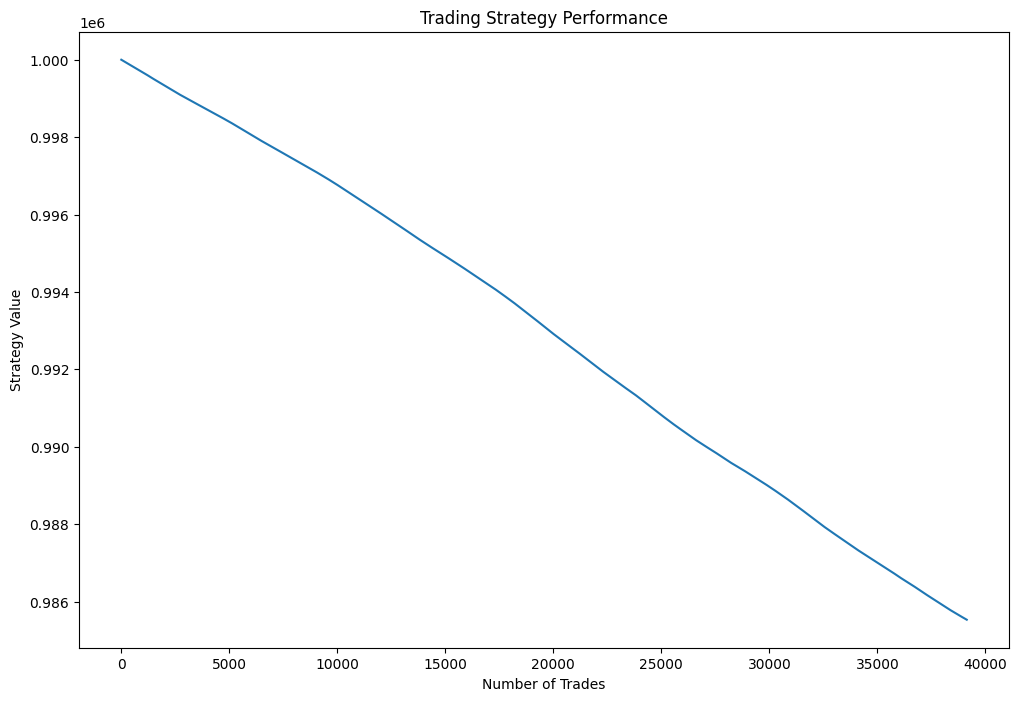

In [16]:
strategy.plot_results(best = True)

---

## <font color='navy'>  Strategy Results <font color='black'> 


In an exploration of different indicators using Deep Learning techniques, the most effective result was achieved using a: 

Deep Neural Network ['DNN'] 

This approach resulted in a strategy value of **855293.224539** 

Starting from an initial fund of **$100,000**, this represents a substantial loss of  **-14.47%**

It's important to note that DNNs are versatile and can be used for a wide range of applications including regression, classification, and even forecasting continuous variables like stock prices. DNNs are particularly beneficial in complex scenarios where relationships between inputs and outputs are non-linear and involve interactions of multiple variables.





The best parameters we found for our stop loss and take profit were:

Best parameters found: {'stop_loss_pct': 0.9833072235364051, 'take_profit_pct': 1.099778215578512, 'n_shares': 1}

This indicates a risk ratio of 1.11 which is quite balanced.

## <font color='navy'>  We encounter two main issues <font color='black'> 

In utilizing Deep Learning models such as DNNs, LSTMs, and CNNs for stock market predictions, two key challenges are often encountered:

1. **Model Limitations:** 
   - **DNNs** might overfit complex datasets.
   - **LSTMs** could retain outdated information in volatile markets.
   - **CNNs** may overlook important temporal patterns unless specifically adapted for time series data.
  

2. **Insufficient Features:** 
   - The effectiveness of these models heavily relies on the relevance and comprehensiveness of the input features. Inadequate features can lead to inaccurate predictions and potential financial losses.


## <font color='navy'>  Conclusions <font color='black'> 


The limitations of Deep Learning models like DNNs, LSTMs, and CNNs stem from their challenges in capturing the intricate and dynamic relationships within stock market data, compounded by their dependence on the quality and comprehensiveness of the training data, which can impact their ability to generalize effectively to new scenarios.

While it's feasible to deploy these advanced neural networks to forecast stock performance, such as that of AAPL, it's crucial to acknowledge the constraints and difficulties these models may encounter. The inherent complexity and unpredictability of the stock market can lead to negative returns, a reflection of both market volatility and model limitations.

Even though Deep Learning strategies can enhance trading performance and refine investment decisions, the outcomes from such applications highlight the importance of thorough market analysis and a profound understanding of the employed models. It's vital to weigh both the potential for profit and the capacity to handle risks and respond to market changes. A blended strategy that combines passive and algorithmic methods might provide a well-rounded approach, maximizing the advantages of each and potentially yielding more stable and gratifying long-term outcomes.

---

## <font color='navy'>  Passive Strategy vs Deep Learning Strategy <font color='black'> 

The asset's return from the first closing to the last closing is: 18.54%
The strategy's return from the first closing to the last closing is: -4.04%


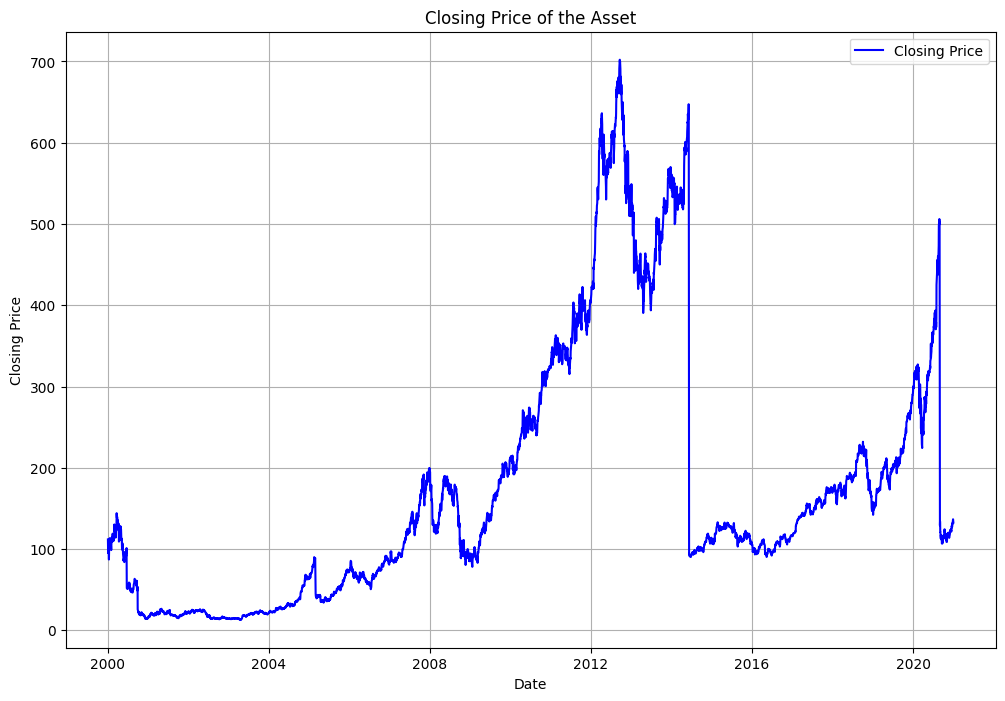

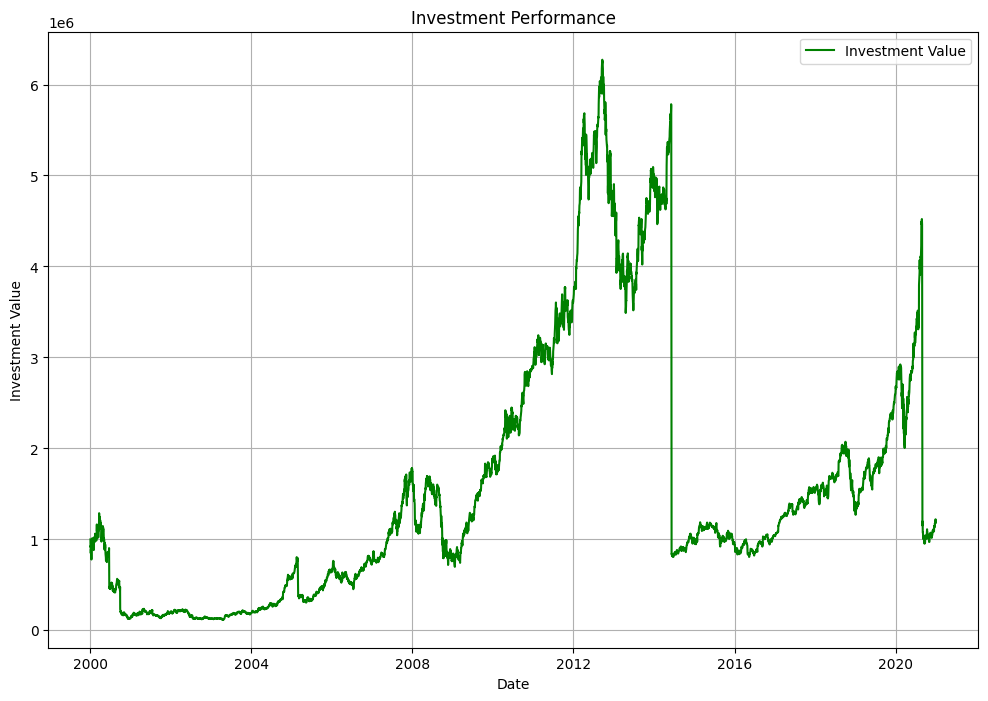

The final value of the investment: $1,185,443.41
The asset's return from the first closing to the last closing is: 18.54%
The strategy's return from the first closing to the last closing is: -4.04%
Difference between the passive strategy and the machine learning strategy is: 22.58%


In [18]:
calcular_rendimiento_pasiva('data/aapl_1d_train.csv')

---